In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
# CELL INDEX: 0
# En esta celda se importan las bibliotecas necesarias para el análisis y procesamiento de datos, así como para la creación y entrenamiento de modelos de aprendizaje profundo. 
# Las bibliotecas importadas incluyen numpy, pandas, re, matplotlib.pyplot, seaborn, torch, torch.nn, torch.optim, y DataLoader de torch.utils.data.

# CELL INDEX: 2
# Esta celda se encarga de importar el dataset desde un archivo CSV llamado 'Amazon-Products.csv'. 
# Luego, se toma una muestra aleatoria de 10,000 registros para trabajar con un subconjunto manejable de datos y se reinician los índices.

# CELL INDEX: 3
# En esta celda se muestra la forma del DataFrame, es decir, el número de filas y columnas que contiene.

# CELL INDEX: 4
# Aquí se elimina la columna 'link' del DataFrame, ya que no se utilizará en el análisis posterior.

# CELL INDEX: 5
# Esta celda muestra los valores únicos de la columna 'name' del DataFrame, que representa los nombres de los productos.

# CELL INDEX: 6
# En esta celda se identifican y muestran las filas duplicadas basadas en la columna 'name'. 
# Se muestran las primeras 100 filas duplicadas para su revisión.

# CELL INDEX: 7
# Aquí se ordenan las filas duplicadas por el nombre del producto y se muestran las primeras 50 filas ordenadas.

# CELL INDEX: 8
# Esta celda define una función para limpiar los nombres de los productos, eliminando caracteres especiales, convirtiendo a minúsculas y eliminando espacios en blanco. 
# Luego, se aplica esta función a la columna 'name' del DataFrame.

# CELL INDEX: 9
# En esta celda se muestran los valores únicos de la columna 'name' después de haber sido limpiados.

# CELL INDEX: 10
# Aquí se muestran los valores únicos de la columna 'main_category', que representa las categorías principales de los productos.

# CELL INDEX: 11
# Esta celda define una función para limpiar y estandarizar las categorías principales. 
# Luego, se aplica esta función a la columna 'main_category' del DataFrame.

# CELL INDEX: 12
# En esta celda se muestran los valores únicos de la columna 'main_category' después de haber sido limpiados y estandarizados.

# CELL INDEX: 13
# Aquí se cuentan las ocurrencias de cada categoría principal y se almacenan en la variable 'main_category'. 
# También se almacenan los valores de conteo en la variable 'maincat_counts'.

# CELL INDEX: 14
# Esta celda crea un gráfico de barras para visualizar la distribución de las categorías principales. 
# Se utilizan colores personalizados y se ajustan las etiquetas y el diseño del gráfico.

# CELL INDEX: 15
# En esta celda se muestran los valores únicos de la columna 'sub_category', que representa las subcategorías de los productos.

# CELL INDEX: 16
# Aquí se define una función para limpiar y estandarizar las subcategorías. 
# Luego, se aplica esta función a la columna 'sub_category' del DataFrame.

# CELL INDEX: 17
# Esta celda cuenta las ocurrencias de cada subcategoría y selecciona las 20 más comunes. 
# Luego, se crea un gráfico de barras horizontal para visualizar la distribución de estas subcategorías.

# CELL INDEX: 18
# En esta celda se muestran los valores únicos de la columna 'ratings', que representa las calificaciones de los productos.

# CELL INDEX: 19
# Aquí se reemplazan ciertos valores no numéricos en la columna 'ratings' con 0.0 y se convierten los valores a tipo float. 
# Luego, se formatean las calificaciones para que tengan un formato consistente.

# CELL INDEX: 20
# En esta celda se cuenta el número de valores nulos en la columna 'ratings'.

# CELL INDEX: 21
# Aquí se convierte la columna 'ratings' a tipo numérico y se crea un gráfico de distribución para visualizar la distribución de las calificaciones. 
# Se ajustan las etiquetas y el diseño del gráfico.

# CELL INDEX: 22
# En esta celda se muestran los nombres de las columnas del DataFrame.

# CELL INDEX: 23
# Aquí se cuenta el número de valores nulos en la columna 'no_of_ratings'.

# CELL INDEX: 24
# En esta celda se eliminan las comas de la columna 'no_of_ratings' y se convierte a tipo numérico.

# CELL INDEX: 25
# Aquí se calcula el porcentaje de valores nulos en la columna 'no_of_ratings' y se imprime el resultado.

# CELL INDEX: 26
# En esta celda se cuentan las ocurrencias de cada valor en la columna 'no_of_ratings'.

# CELL INDEX: 27
# Aquí se rellenan los valores nulos en la columna 'no_of_ratings' con 0.

# CELL INDEX: 28
# En esta celda se calculan los límites inferior y superior para los valores atípicos en la columna 'no_of_ratings' utilizando el rango intercuartílico (IQR). 
# Luego, se recortan los valores fuera de estos límites y se crea un gráfico de caja para visualizar la distribución.

# CELL INDEX: 29
# Aquí se cuentan las ocurrencias de los 20 valores más comunes en la columna 'no_of_ratings' y se crea un gráfico de barras para visualizar la distribución.

# CELL INDEX: 30
# En esta celda se muestran los valores únicos de la columna 'discount_price', que representa los precios con descuento de los productos.

# CELL INDEX: 31
# Aquí se extraen los valores numéricos de las columnas 'discount_price' y 'actual_price', eliminando los símbolos de moneda y otros caracteres.

# CELL INDEX: 32
# En esta celda se eliminan las comas de las columnas 'discount_price' y 'actual_price' y se convierten a tipo float.

# CELL INDEX: 33
# Aquí se eliminan los espacios en blanco de las columnas 'main_category' y 'sub_category'.

# CELL INDEX: 34
# En esta celda se rellenan los valores nulos en las columnas 'discount_price' y 'actual_price' con la mediana de cada columna.

# CELL INDEX: 35
# Aquí se convierte la columna 'ratings' a tipo numérico y se rellenan los valores nulos con la media de la columna.

# CELL INDEX: 36
# En esta celda se vuelven a verificar los valores nulos en el DataFrame.

# CELL INDEX: 37
# Aquí se seleccionan las columnas relevantes para el análisis y se eliminan los registros sin calificaciones. 
# Luego, se convierte la columna 'ratings' a tipo float.

# CELL INDEX: 38
# En esta celda se simulan usuarios asignando un 'user_id' a cada interacción de producto y se asigna un ID único a cada producto.

# CELL INDEX: 39
# Aquí se generan IDs únicos para las categorías principales y se almacenan en la columna 'category_id'.

# CELL INDEX: 40
# En esta celda se crea una matriz de interacciones usuario-producto-categoría y se guardan los DataFrames resultantes en archivos CSV. 
# También se crea una matriz de usuario-producto para su uso en PyTorch.

# CELL INDEX: 41
# Aquí se define una clase de Dataset personalizada para PyTorch que incluye las interacciones usuario-producto-categoría y las calificaciones correspondientes.

# CELL INDEX: 42
# En esta celda se define el modelo de red neuronal colaborativa (NCF) con categorías utilizando PyTorch. 
# El modelo incluye capas de embedding para usuarios, productos y categorías, así como capas totalmente conectadas.

# CELL INDEX: 43
# Aquí se configuran los parámetros del modelo, como la dimensión de los embeddings, las capas, la tasa de aprendizaje, el tamaño del lote y el número de épocas. 
# También se crea un DataLoader para el entrenamiento del modelo.

# CELL INDEX: 44
# En esta celda se entrena el modelo NCF con categorías utilizando el DataLoader y se registra la pérdida en cada época.

# CELL INDEX: 45
# Aquí se guarda el modelo entrenado en archivos utilizando torch.save().

# CELL INDEX: 46
# En esta celda se generan recomendaciones para un usuario específico considerando su categoría favorita. 
# Se filtran los productos por la categoría favorita y se obtienen las predicciones del modelo para recomendar los productos mejor puntuados.

# CELL INDEX: 47
# Aquí se define una función para calcular la métrica Precision@K, que mide el porcentaje de elementos relevantes en el top K de recomendaciones.

# CELL INDEX: 48
# En esta celda se define una función para calcular la métrica Recall@K, que mide el porcentaje de elementos relevantes recomendados en el top K.

# CELL INDEX: 49
# Aquí se define una función para calcular el F1-Score@K, que es la media armónica de Precision@K y Recall@K.

# CELL INDEX: 50
# En esta celda se define una función para evaluar el modelo obteniendo las métricas Precision@K, Recall@K y F1-Score@K para un usuario específico. 
# Se prueba la evaluación con el usuario 10.

In [52]:
# importing the dataset 

df_1= pd.read_csv('Amazon-Products.csv')
df = df_1.sample(n=10000, random_state=42).reset_index(drop=True)


In [53]:
df.shape

(10000, 10)

In [54]:
# Not going to use this column
df = df.drop(['link'], axis=1)

In [55]:
df['name'].unique()

array(['MyBlush Women Top',
       'Ridhi Home & Decor Brass Decorative Weighing Scale Set, 10 g (Golden and Brown)',
       "Rangshaily Men's Black White Floral Print Fullsleeves Premium Cotton Regular Fit Shirt with Spread Collar",
       ...,
       'Parineeta Gems Panna Stone Original Certified/Panna Stone/emerold Stone/Panna Stone 6.00 Ratti Original Certified/Panna St...',
       'Knotty Needles Check Pattern Round Neck Sweatshirt for Women',
       "Aadya's Creation® Cotton Multi Color Round Neck Regular Fit T-Shirt for Men and Women| Personalized T-Shirt Create Your Ow..."],
      dtype=object)

In [56]:
# Displaying duplicate rows based on the 'name' column

duplicate_names = df[df['name'].duplicated(keep=False)]

# Showing the data where there are only duplicated rows

duplicate_names.head(100)

,Unnamed: 0,name,main_category,sub_category,image,ratings,no_of_ratings,discount_price,actual_price
6,11832,Avsar 14k (585) Yellow Gold Ring for Women,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/I/71er7EuZ1w...,NaN,NaN,"₹16,312","₹39,524"
17,7966,Spykar Men's Super Skinny Fit Jeans,men's clothing,Jeans,https://m.media-amazon.com/images/W/IMAGERENDE...,3.0,1,"₹1,529","₹3,399"
28,7948,RARE Women Casual Dress,women's clothing,Western Wear,https://m.media-amazon.com/images/I/61t4HcaTlD...,2.8,8,₹748,"₹1,999"
34,774,ZEYO Women's Cotton Heart Printed Night Suit S...,women's clothing,Clothing,https://m.media-amazon.com/images/I/81zEqFPNJw...,4.1,"1,494",₹849,"₹2,499"
69,3047,Van Heusen Men's Track Pants,stores,Men's Fashion,https://m.media-amazon.com/images/W/IMAGERENDE...,3.9,"1,811",₹959,"₹1,199"
...,...,...,...,...,...,...,...,...,...
1792,10086,PC Jeweller 18k (750) Yellow Gold and Solitair...,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/W/IMAGERENDE...,NaN,NaN,"₹63,878","₹75,150"
1798,2413,BlueRigger Ultra Series 8K HDMI to HDMI Cable ...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/W/IMAGERENDE...,4.3,540,"₹1,049","₹37,073"
1803,3488,Jack & Jones Men Briefs,men's clothing,Innerwear,https://m.media-amazon.com/images/I/81n5WzZMkV...,1.0,1,₹650,"₹1,299"
1852,7056,AMPEREUS Digital Pre-Calibrated Imported Pen T...,appliances,Kitchen & Home Appliances,https://m.media-amazon.com/images/I/41YgN0KKfK...,4.2,147,₹259,₹999


In [57]:
duplicate_names_sorted = duplicate_names.sort_values(by='name')
duplicate_names_sorted.head(50)

,Unnamed: 0,name,main_category,sub_category,image,ratings,no_of_ratings,discount_price,actual_price
3191,19032,14 KT (585) Yellow Gold and Diamond Ring Jewel...,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/I/41kS5E5m34...,NaN,NaN,"₹26,036","₹45,324"
1768,19076,14 KT (585) Yellow Gold and Diamond Ring Jewel...,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/W/IMAGERENDE...,NaN,NaN,"₹29,748","₹53,640"
4638,15256,AJANTA Mens Black Formal Shoes,men's shoes,Formal Shoes,https://m.media-amazon.com/images/I/51+RBrCyRn...,NaN,NaN,NaN,"₹1,249"
6927,15263,AJANTA Mens Black Formal Shoes,men's shoes,Formal Shoes,https://m.media-amazon.com/images/I/51ij9mnTyk...,3.0,2,NaN,"₹1,289"
4581,9066,AMPEREUS Digital Pre-Calibrated Imported Pen T...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,4.2,147,₹259,₹999
1852,7056,AMPEREUS Digital Pre-Calibrated Imported Pen T...,appliances,Kitchen & Home Appliances,https://m.media-amazon.com/images/I/41YgN0KKfK...,4.2,147,₹259,₹999
4325,3391,ARiANA DuoSafe Unisex Kid's Very Fine Cotton C...,accessories,Bags & Luggage,https://m.media-amazon.com/images/I/61Ss3Crz2J...,4.1,"2,748",NaN,₹250
3950,3727,ARiANA DuoSafe Unisex Kid's Very Fine Cotton C...,accessories,Bags & Luggage,https://m.media-amazon.com/images/I/61Ss3Crz2J...,4.1,"2,748",NaN,₹250
3162,13107,ASHWATH Women's Printed Nazneen Dupatta.,women's clothing,Clothing,https://m.media-amazon.com/images/W/IMAGERENDE...,3.8,100,₹299,₹777
9751,4960,ASHWATH Women's Printed Nazneen Dupatta.,women's clothing,Ethnic Wear,https://m.media-amazon.com/images/I/71DkxAj-Az...,3.8,100,₹299,₹777


In [58]:
def clean_product_names(name):

    if isinstance(name, str):  # Ensure it's a string

        # Remove special characters

        name = re.sub(r'[^a-zA-Z0-9\s]+', '', name)

        # Convert to lowercase

        name = name.lower()

        # Trim whitespace

        name = name.strip()

    return name

df['name'] = df['name'].apply(clean_product_names)

In [59]:
df['name'].unique()

array(['myblush women top',
       'ridhi home  decor brass decorative weighing scale set 10 g golden and brown',
       'rangshaily mens black white floral print fullsleeves premium cotton regular fit shirt with spread collar',
       ...,
       'parineeta gems panna stone original certifiedpanna stoneemerold stonepanna stone 600 ratti original certifiedpanna st',
       'knotty needles check pattern round neck sweatshirt for women',
       'aadyas creation cotton multi color round neck regular fit tshirt for men and women personalized tshirt create your ow'],
      dtype=object)

In [60]:
df['main_category'].unique()

array(["women's clothing", 'appliances', "men's clothing", "men's shoes",
       "kids' fashion", 'accessories', 'beauty & health', "women's shoes",
       'toys & baby products', 'home & kitchen', 'tv, audio & cameras',
       'car & motorbike', 'stores', 'grocery & gourmet foods',
       'sports & fitness', 'bags & luggage', 'pet supplies',
       'industrial supplies', 'music', 'home, kitchen, pets'],
      dtype=object)

In [61]:
# Function to clean and standardize the main_category
def clean_category(category):
    category = category.lower()
    category = category.strip()
    category = category.replace('&', 'and')
    category = category.replace(',', '')
    if "home" in category:
        category = 'home and kitchen'
    return category
df['main_category'] = df['main_category'].apply(clean_category)

In [62]:
df['main_category'].unique()

array(["women's clothing", 'appliances', "men's clothing", "men's shoes",
       "kids' fashion", 'accessories', 'beauty and health',
       "women's shoes", 'toys and baby products', 'home and kitchen',
       'tv audio and cameras', 'car and motorbike', 'stores',
       'grocery and gourmet foods', 'sports and fitness',
       'bags and luggage', 'pet supplies', 'industrial supplies', 'music'],
      dtype=object)

In [63]:
main_category = df['main_category'].value_counts()
maincat_counts = main_category.values

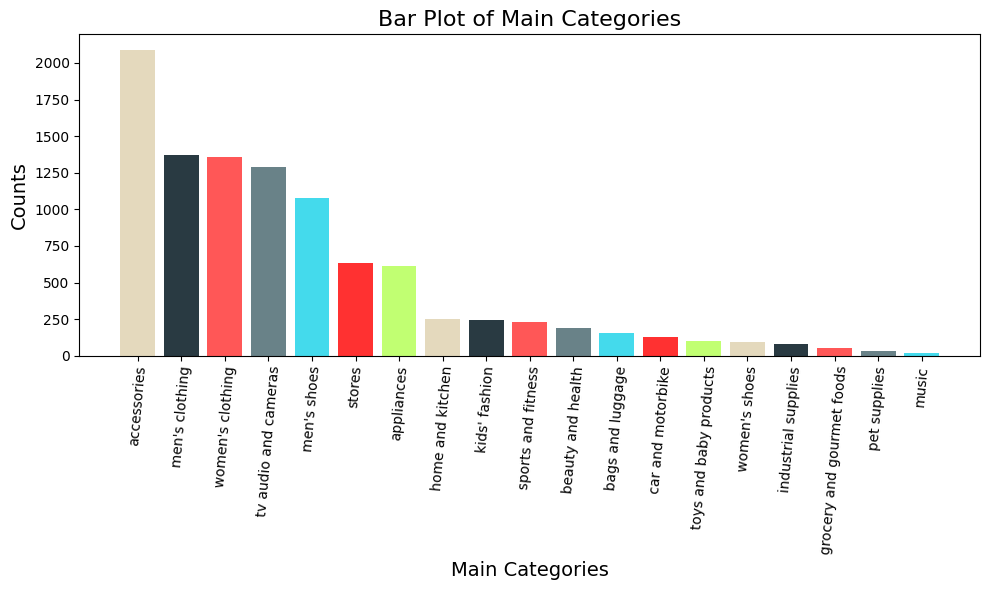

In [64]:
# Custom colors
colors = ['#e4d9bd', '#293a42', '#ff5757', '#698288', '#44daec', '#ff3131', '#c1ff72']
# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(main_category.index, maincat_counts, color=colors)
plt.title('Bar Plot of Main Categories', fontsize=16)
plt.xlabel('Main Categories', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

In [65]:
df['sub_category'].unique()

array(['Western Wear', 'All Appliances', 'Shirts', 'Sports Shoes',
       'T-shirts & Polos', "Kids' Watches", 'Gold & Diamond Jewellery',
       'Innerwear', 'Fashion & Silver Jewellery', 'Formal Shoes',
       'Household Supplies', 'Fashion Sandals', 'Casual Shoes',
       'Nursing & Feeding', 'Bags & Luggage', 'Jeans',
       'Garden & Outdoors', 'Clothing', 'Lingerie & Nightwear',
       'Speakers', 'Car Parts', 'Sportswear', 'Cameras', 'Jewellery',
       'All Electronics', "Men's Fashion", 'Heating & Cooling Appliances',
       'Ballerinas', 'Coffee, Tea & Beverages',
       'Home Entertainment Systems', 'Headphones',
       'The Designer Boutique', 'Kitchen & Home Appliances',
       'Amazon Fashion', 'Security Cameras', 'Watches',
       'Camera Accessories', 'School Bags', 'Handbags & Clutches',
       'Ethnic Wear', 'Make-up', 'Strength Training', 'Diet & Nutrition',
       'Rucksacks', 'Furniture', "Kids' Clothing", 'Toys & Games',
       'All Home & Kitchen', 'All Grocery &

In [66]:
# Function to clean and standardize sub_category
def clean_sub_category(category):
    category = category.lower().strip()  
    category = category.replace('&', 'and')  
    category = category.replace(',', '')  
    category = category.replace("'", "")
    category = category.replace('-','')
    return category.title()  
df['sub_category'] = df['sub_category'].apply(clean_sub_category)

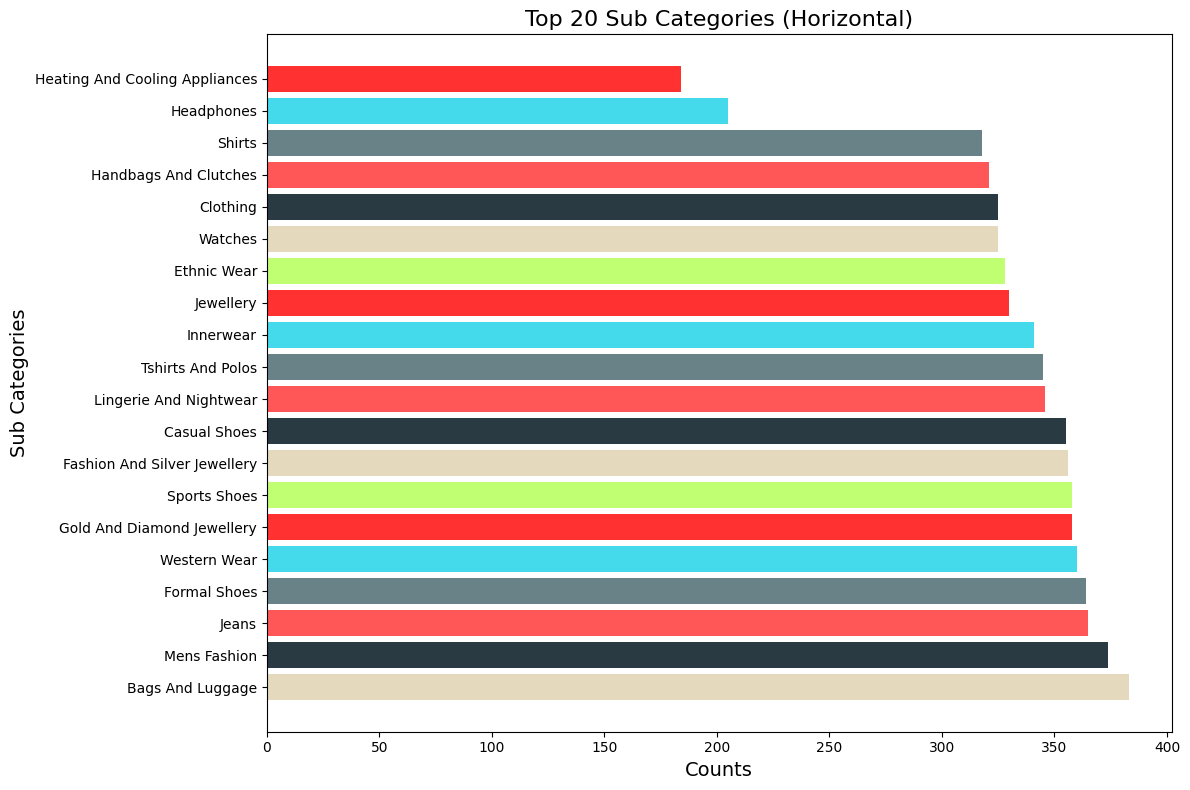

In [67]:
subcat_counts = df['sub_category'].value_counts()
top_20_subcats = subcat_counts.nlargest(20)
colors = ['#e4d9bd', '#293a42', '#ff5757', '#698288', '#44daec', '#ff3131', '#c1ff72'] * 3  
plt.figure(figsize=(12, 8))
plt.barh(top_20_subcats.index, top_20_subcats, color=colors[:len(top_20_subcats)])  # Use only necessary colors
plt.title('Top 20 Sub Categories (Horizontal)', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Sub Categories', fontsize=14)
plt.tight_layout()
plt.show()

In [68]:
df['ratings'].unique()

array(['3.5', '3.7', nan, '3.6', '5.0', '4.5', '3.4', '4.0', '4.4', '3.0',
       '3.3', '2.8', '2.3', '1.8', '4.2', '3.9', '4.1', '2.4', '4.3',
       '2.9', '4.6', '3.2', '1.0', '3.8', '2.0', '4.7', '2.5', '4.9',
       'Get', '3.1', '2.7', '4.8', '1.4', '1.9', '2.6', '2.2', 'FREE',
       '1.5', '1.3', '2.1', '1.7', '1.6', '₹2.99'], dtype=object)

In [69]:
df['ratings'] = df['ratings'].replace(['Get', 'FREE', '₹68.99', '₹65', '₹70', '₹100', '₹99', '₹2.99'], 0.0)
df['ratings'] = df['ratings'].astype(float)
df['ratings'] = df['ratings'].apply(lambda x: f"{int(x)}.{int((x - int(x)) * 10)}" if pd.notnull(x) else '0.0')
print(df['ratings'].unique())

['3.5' '3.7' '0.0' '3.6' '5.0' '4.5' '3.3' '4.0' '4.4' '3.0' '3.2' '2.7'
 '2.2' '1.8' '4.2' '3.9' '2.3' '2.9' '1.0' '2.0' '4.7' '2.5' '4.9' '3.1'
 '1.3' '1.9' '2.6' '1.5' '2.1' '1.7' '1.6']


In [70]:
df['ratings'].isnull().sum()

np.int64(0)

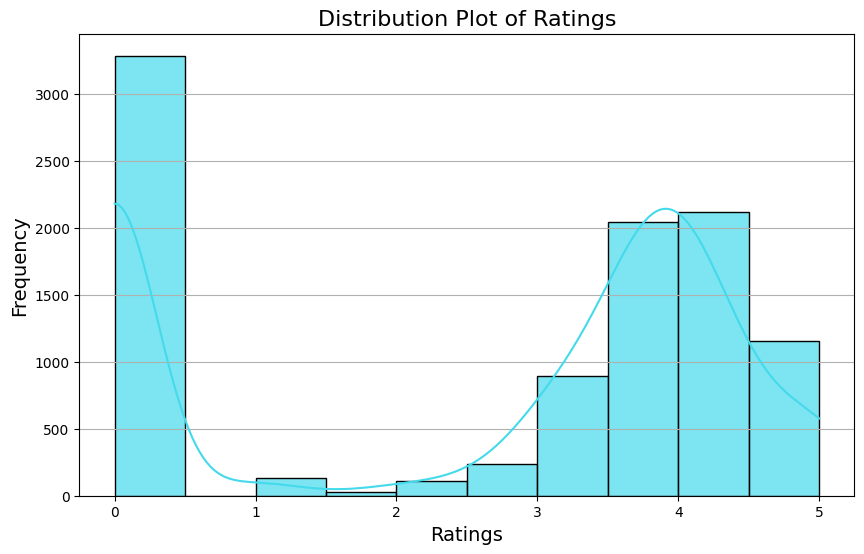

In [71]:
# Convert ratings to numeric
df['ratings'] = pd.to_numeric(df['ratings'])
# Create a distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['ratings'], bins=10, kde=True, color='#44daec', alpha=0.7)
# Set title and labels
plt.title('Distribution Plot of Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# Show the plot
plt.grid(axis='y')
plt.show()

In [72]:
df.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [73]:
df['no_of_ratings'].isnull().sum()

np.int64(3151)

In [74]:
df['no_of_ratings'] = df['no_of_ratings'].str.replace(',', '', regex=False)
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')

In [75]:
percentage_null = df['no_of_ratings'].isnull().mean() * 100
print(percentage_null)

32.84


In [76]:
df['no_of_ratings'].value_counts()

no_of_ratings
1.0       722
2.0       471
3.0       346
4.0       264
6.0       193
         ... 
1182.0      1
2350.0      1
1330.0      1
2299.0      1
148.0       1
Name: count, Length: 1164, dtype: int64

In [77]:
df['no_of_ratings'] = df['no_of_ratings'].fillna(0)

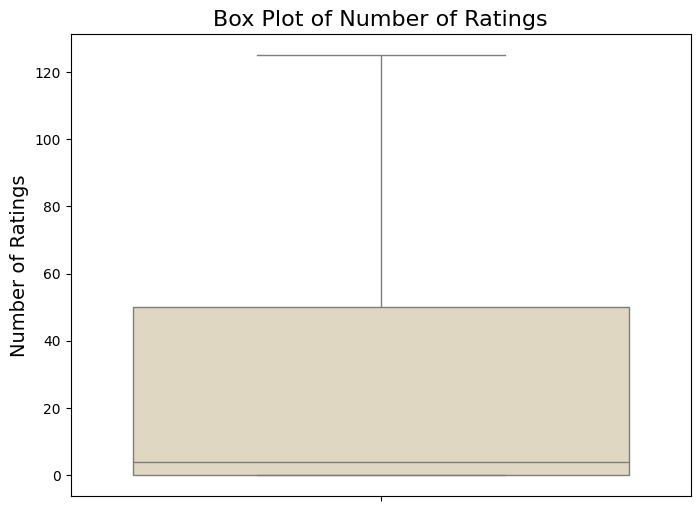

In [78]:
Q1 = df['no_of_ratings'].quantile(0.25)
Q3 = df['no_of_ratings'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['no_of_ratings'] = df['no_of_ratings'].clip(lower_bound, upper_bound)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['no_of_ratings'], color=colors[0])  # Using the first color
plt.title('Box Plot of Number of Ratings', fontsize=16)
plt.ylabel('Number of Ratings', fontsize=14)
# Show the plot

plt.show()

/tmp/ipykernel_237284/316660205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=colors[:len(rating_counts)])  # Use a subset of colors


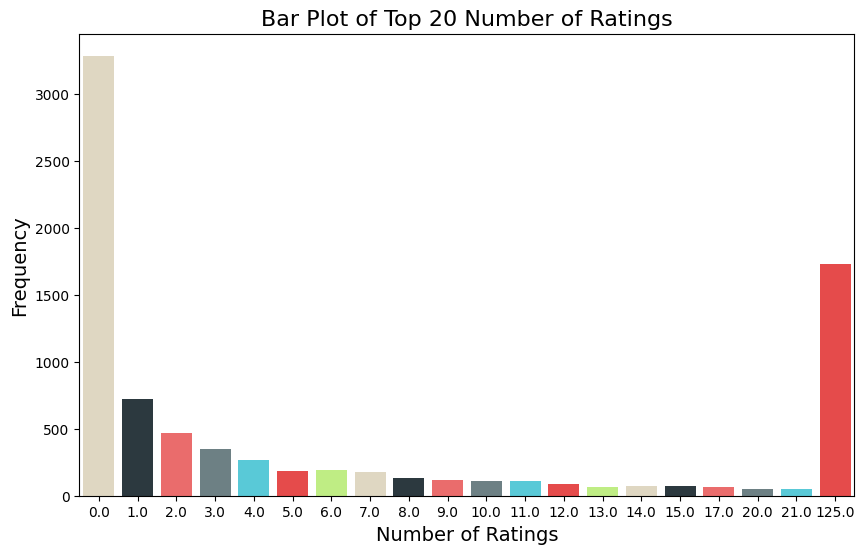

In [79]:
# Value counts of no_of_ratings and get the top 20
rating_counts = df['no_of_ratings'].value_counts().nlargest(20)
# Create a bar plot with specified colors
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=colors[:len(rating_counts)])  # Use a subset of colors
plt.title('Bar Plot of Top 20 Number of Ratings', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# Show the plot
plt.show()

In [80]:
unique_discount_prices = df['discount_price'].unique()
# Print the unique values
unique_discount_prices

array(['₹699', '₹380', '₹649', ..., '₹23,926', '₹10,611', '₹1,070'],
      dtype=object)

In [81]:
df["discount_price"] = df["discount_price"].str.split(" ", expand = True).get(0).str.split("₹", expand = True).get(1)
df["actual_price"] = df["actual_price"].str.split(" ", expand = True).get(0).str.split("₹", expand = True).get(1)

In [82]:
# Change commas to dots and change the type to float

df['discount_price'] = df["discount_price"].str.replace(',', '').astype(float)

df["actual_price"] = df["actual_price"].str.replace(',', '').astype(float)

In [83]:
df['main_category'] = df['main_category'].str.replace(' ', '')

df['sub_category'] = df['sub_category'].str.replace(' ', '')

In [84]:
# Fill NaN values with the median for discount_price and actual_price

df['discount_price'] = df['discount_price'].fillna(df['discount_price'].median())

df['actual_price'] = df['actual_price'].fillna(df['actual_price'].median())

In [85]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

df['ratings'] = df['ratings'].fillna(df['ratings'].mean())

In [86]:
# rechecking the null values 

df.isnull().sum()

Unnamed: 0        0
name              0
main_category     0
sub_category      0
image             0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [87]:
# 📌 2. Usar los ratings reales del dataset
df = df[['name', 'main_category', 'sub_category', 'image','ratings']]  # Seleccionar columnas relevantes
df = df.dropna(subset=['ratings'])  # Eliminar registros sin ratings
df['ratings'] = df['ratings'].astype(float)  # Convertir ratings a formato numérico

In [88]:
# Simular usuarios (asignar un user_id a cada interacción de producto si no hay datos de usuario)
df['user_id'] = np.random.randint(1, 5000, size=len(df))  # Simulamos 5000 usuarios
df['product_id'] = df.index + 1  # Asignar un ID único a cada producto

In [89]:
# Generar IDs únicos para categorías
df['category_id'] = df['main_category'].astype('category').cat.codes

In [90]:
# 📌 3. Crear la matriz usuario-producto-categoría
df_interactions = df[['user_id', 'product_id', 'ratings', 'category_id']]
df.to_csv('products.csv', index=False)
df_interactions.to_csv('interactions.csv', index=False)
num_users = df_interactions['user_id'].nunique()
num_items = df_interactions['product_id'].nunique()
num_categories = df_interactions['category_id'].nunique()

df_pivot = df_interactions.pivot(index="user_id", columns="product_id", values="ratings").fillna(0)
user_item_matrix = torch.tensor(df_pivot.values, dtype=torch.float32)

print(f"Matriz usuario-producto de dimensión: {user_item_matrix.shape}")

Matriz usuario-producto de dimensión: torch.Size([4301, 10000])


In [91]:
# 📌 4. Crear el Dataset para PyTorch
class AmazonDataset(Dataset):
    def __init__(self, df_interactions):
        self.user_item_pairs = df_interactions[['user_id', 'product_id', 'category_id']].values
        self.labels = df_interactions['ratings'].values
        self.n_users = df_interactions['user_id'].nunique()
        self.n_items = df_interactions['product_id'].nunique()
        self.n_categories = df_interactions['category_id'].nunique()

    def __len__(self):
        return len(self.user_item_pairs)

    def __getitem__(self, idx):
        user, item, category = self.user_item_pairs[idx]
        return (torch.tensor(user, dtype=torch.long),
                torch.tensor(item, dtype=torch.long),
                torch.tensor(category, dtype=torch.long)), \
                torch.tensor(self.labels[idx], dtype=torch.float32)

dataset = AmazonDataset(df_interactions)
print(f"Dataset creado con {len(dataset)} interacciones")

Dataset creado con 10000 interacciones


In [92]:
# 📌 5. Definir el modelo NCF con categorías
class NCF_With_Categories(nn.Module):
    def __init__(self, n_users, n_items, n_categories, embedding_dim, layers):
        super(NCF_With_Categories, self).__init__()
        
        self.user_embedding = nn.Embedding(n_users, embedding_dim)
        self.item_embedding = nn.Embedding(n_items, embedding_dim)
        self.category_embedding = nn.Embedding(n_categories, embedding_dim)

        self.fc_layers = nn.ModuleList()
        for i in range(len(layers) - 1):
            self.fc_layers.append(nn.Linear(layers[i], layers[i+1]))

        self.output_layer = nn.Linear(layers[-1], 1)
        self.activation = nn.ReLU()

    def forward(self, user_input, item_input, category_input):
        user_embedded = self.user_embedding(user_input)
        item_embedded = self.item_embedding(item_input)
        category_embedded = self.category_embedding(category_input)

        x = torch.cat([user_embedded, item_embedded, category_embedded], dim=-1)

        for layer in self.fc_layers:
            x = self.activation(layer(x))

        output = self.output_layer(x)
        return output.squeeze()

In [93]:
# 📌 6. Configuración del modelo
embedding_dim = 64
layers = [embedding_dim * 3, 128, 64, 32]  # Cambiar tamaño por los embeddings adicionales
lr = 0.001
batch_size = 256
n_epochs = 10

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [94]:
# 📌 7. Entrenamiento del modelo
torch.manual_seed(1983)
model = NCF_With_Categories(dataset.n_users, dataset.n_items, dataset.n_categories, embedding_dim, layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

print(f"Entrenando modelo con {sum(p.numel() for p in model.parameters() if p.requires_grad)} parámetros")

history = []
for epoch in range(n_epochs):
    model.train()
    total_loss = 0
    for (user, item, category), label in dataloader:
        # Ensure indices are within valid range
        user = user.clamp(0, dataset.n_users - 1)
        item = item.clamp(0, dataset.n_items - 1)
        category = category.clamp(0, dataset.n_categories - 1)
        
        optimizer.zero_grad()
        output = model(user, item, category)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    history.append(total_loss / len(dataloader))
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {total_loss/len(dataloader):.4f}")



Entrenando modelo con 951553 parámetros
Epoch 1/10, Loss: 5.6985
Epoch 2/10, Loss: 3.3433
Epoch 3/10, Loss: 3.1570
Epoch 4/10, Loss: 3.0408
Epoch 5/10, Loss: 2.9590
Epoch 6/10, Loss: 2.8253
Epoch 7/10, Loss: 2.6664
Epoch 8/10, Loss: 2.4850
Epoch 9/10, Loss: 2.2707
Epoch 10/10, Loss: 1.9520


In [95]:
# 📌 8. Guardar el modelo
torch.save(model.state_dict(), "ncf_model_with_categories.pth")
torch.save(model, "ncf_model_with_categories.pt")
print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.


In [96]:
# 📌 9. Generar recomendaciones considerando la categoría favorita del usuario
model.eval()
user_id = 10  # Usuario de prueba

# Obtener la categoría favorita del usuario
preferred_category = df[df['user_id'] == user_id]['category_id'].mode()[0]

# Filtrar los productos que pertenecen a la categoría favorita del usuario
category_filtered_df = df[df['category_id'] == preferred_category]

if category_filtered_df.empty:
    print(f"No hay productos en la categoría {preferred_category} para recomendar.")
else:
    product_ids = torch.tensor(category_filtered_df['product_id'].values, dtype=torch.long)

    with torch.no_grad():
        user_tensor = torch.full_like(product_ids, user_id)
        category_tensor = torch.full_like(product_ids, preferred_category)
        
        predictions = model(user_tensor, product_ids, category_tensor)

    # Obtener los productos mejor puntuados dentro de la categoría
    top_indices = predictions.argsort(descending=True)[:10]
    recommended_products = category_filtered_df.iloc[top_indices.numpy()]  # Convertir a numpy para evitar warnings

    print(f"Recomendaciones para el usuario {user_id} en la categoría {preferred_category}:")
    print(recommended_products[['name', 'ratings']])


Recomendaciones para el usuario 10 en la categoría 0:
                                                   name  ratings
6299  earthsave cotton premium sling bagcanvas sling...      5.0
6903  nemichand jewels pure 925 sterling silver naza...      4.2
1493  glive foldable big carry on large capacity fol...      3.6
642   precious moments bis hallmarked personalised n...      5.0
5368     wildhorn blue leather mens card holder whcc207      4.0
5829                        fristo womens handbag green      4.0
9673         kundan 22k 916 queen 4 gm yellow gold coin      4.2
5701  ee exegi travel shoe bag  convenient packing s...      3.7
9357  zaveri pearls rose gold cubic zirconia contemp...      4.5
219   flingdom clip on earrings  stunning goldplated...      5.0


In [97]:
# 📌 1. Funciones para calcular las métricas
def precision_at_k(recommended_products, actual_products, k=10):
    """Calcula Precision@K: porcentaje de elementos relevantes en el top K."""
    if len(actual_products) == 0:
        return 0.0

    relevant_items = sum(item in actual_products for item in recommended_products[:k])
    return relevant_items / k

In [98]:
def recall_at_k(recommended_products, actual_products, k=10):
    """Calcula Recall@K: porcentaje de elementos relevantes recomendados."""
    if len(actual_products) == 0:
        return 0.0

    relevant_items = sum(item in actual_products for item in recommended_products[:k])
    return relevant_items / len(actual_products)

In [99]:
def f1_score_at_k(precision, recall):
    """Calcula el F1-Score@K."""
    if precision + recall == 0:
        return 0.0

    return 2 * (precision * recall) / (precision + recall)

In [102]:
def evaluate_model(user_id, k=10, relevance_threshold=4.0):
    """Evalúa el modelo obteniendo las métricas Precision@K, Recall@K y F1-Score@K."""
    model.eval()

    # 📌 Verificar si el usuario existe en el DataFrame
    if user_id not in df['user_id'].values:
        print(f"❌ Usuario {user_id} no encontrado en el dataset.")
        return {"Precision": None, "Recall": None, "F1-Score": None}

    # 📌 Obtener la categoría favorita del usuario
    category_series = df[df['user_id'] == user_id]['category_id'].mode()

    if category_series.empty:
        print(f"⚠️ El usuario {user_id} no tiene categoría favorita.")
        return {"Precision": None, "Recall": None, "F1-Score": None}

    preferred_category = category_series.iloc[0]

    # 📌 Filtrar productos de la categoría favorita
    category_filtered_df = df[df['category_id'] == preferred_category]

    if category_filtered_df.empty:
        print(f"⚠️ No hay productos en la categoría {preferred_category}.")
        return {"Precision": None, "Recall": None, "F1-Score": None}

    product_ids = torch.tensor(category_filtered_df['product_id'].values, dtype=torch.long)

    with torch.no_grad():
        user_tensor = torch.full_like(product_ids, user_id)
        category_tensor = torch.full_like(product_ids, preferred_category)
        predictions = model(user_tensor, product_ids, category_tensor)

    top_indices = predictions.argsort(descending=True)[:k]
    recommended_products = category_filtered_df.iloc[top_indices.numpy()]['product_id'].tolist()

    # 📌 Obtener productos relevantes del usuario
    actual_products = df[(df['user_id'] == user_id) & (df['ratings'] >= relevance_threshold)]['product_id'].tolist()

    # 📌 Calcular métricas
    precision = precision_at_k(recommended_products, actual_products, k)
    recall = recall_at_k(recommended_products, actual_products, k)
    f1_score = f1_score_at_k(precision, recall)

    print(f"✅ Precision@{k}: {precision:.4f}")
    print(f"✅ Recall@{k}: {recall:.4f}")
    print(f"✅ F1-Score@{k}: {f1_score:.4f}")

    return {"Precision": precision, "Recall": recall, "F1-Score": f1_score}

# 📌 Probar la evaluación con usuario 4
evaluate_model(user_id=10, k=10)


✅ Precision@10: 0.0000
✅ Recall@10: 0.0000
✅ F1-Score@10: 0.0000


{'Precision': 0.0, 'Recall': 0.0, 'F1-Score': 0.0}